In [39]:
import numpy as np
import matplotlib.pyplot as plt
import random

### VM1 1/2CPU
### VM2 1/4CPU
### VM3 1/8CPU

In [40]:
vm1cpu = 1/2
vm2cpu = 1/4
vm3cpu = 1/8

In [41]:
N = [10,100,1000]

In [42]:
lamda = 0.9

In [43]:
#Decide type of vm
def getTypeVM():
    vmRan=random.random()
    cpu = 0
    if(vmRan <= 1/3):
        cpu = 0.5
    elif(vmRan<=2/3):
        cpu = 0.25
    else:
        cpu = 0.125
    return cpu

In [44]:
def getNumberVMs(n):
    vmno=0
    for i in range(n):
        if(random.random() <= lamda):
            vmno+=1
    return vmno

In [45]:
def getDepartureTime(time, vmtype):
    depatureTime=time
    while(random.random()>vmtype):
        depatureTime+=1
    if(depatureTime==time):
        depatureTime+=1
    return depatureTime
    

In [46]:
def checkdeparture(servers, time):
    slen=len(servers)
    while(slen>0):
        qLen = len(servers[slen-1]['slot'])
        if(len(servers[slen-1]['slot'])==0):
            del servers[slen-1]
        while(qLen > 0):
            if(np.min(servers[slen-1]['slot'])<time):
                break
            elif(servers[slen-1]['slot'][qLen-1] <= time):
                del servers[slen-1]['res'][qLen-1]
                del servers[slen-1]['slot'][qLen-1]
            qLen-=1
        slen-=1

# First Fit

In [47]:
result=[]
for n in N:
    servers =[]
    num_servers = []
    for i in range(10**3):
        checkdeparture(servers, i)
        numberVMs = getNumberVMs(n)
        for vm in range(numberVMs):
            vmType = getTypeVM()
            depTime = getDepartureTime(i, vmType)
            if(len(servers)==0):
                servers.append({'res': [vmType], 'slot': [depTime]})
            else:
                found = False
                for s in range(len(servers)):
                    if(np.sum(servers[s]['res'])+vmType<=1):
                        servers[s]['res'].append(vmType)
                        servers[s]['slot'].append(depTime)
                        found = True
                        break
                if(not found):
                    servers.append({'res': [vmType], 'slot': [depTime]})
        num_servers.append(len(servers))
    result.append(np.mean(num_servers))

In [48]:
result

[8.5280000000000005, 76.299000000000007, 742.50199999999995]

In [49]:
servers

[{'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.25, 0.125],
  'slot': [1001, 1044, 1003, 1000, 1001, 1004, 1000]},
 {'res': [0.125, 0.25, 0.125, 0.125, 0.125, 0.25],
  'slot': [1011, 1000, 1005, 1010, 1003, 1008]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.25, 0.125, 0.125],
  'slot': [1002, 1002, 1005, 1000, 1002, 1001, 1004]},
 {'res': [0.25, 0.125, 0.125, 0.125, 0.25, 0.125],
  'slot': [1001, 1001, 1005, 1000, 1000, 1003]},
 {'res': [0.125, 0.125, 0.25, 0.25, 0.125, 0.125],
  'slot': [1024, 1008, 1000, 1000, 1002, 1000]},
 {'res': [0.125, 0.25, 0.125, 0.125, 0.125, 0.125, 0.125],
  'slot': [1008, 1001, 1006, 1000, 1002, 1004, 1023]},
 {'res': [0.125, 0.125, 0.25, 0.5], 'slot': [1005, 1001, 1005, 1002]},
 {'res': [0.125, 0.125, 0.125, 0.125, 0.125, 0.25, 0.125],
  'slot': [1008, 1004, 1002, 1044, 1002, 1000, 1007]},
 {'res': [0.25, 0.125, 0.5, 0.125], 'slot': [1004, 1000, 1002, 1001]},
 {'res': [0.125, 0.5, 0.125, 0.25], 'slot': [1000, 1001, 1002, 1001]},
 {'res': [0.125, 0.125, 0.25, 0

In [50]:
plt.plot(N, result)

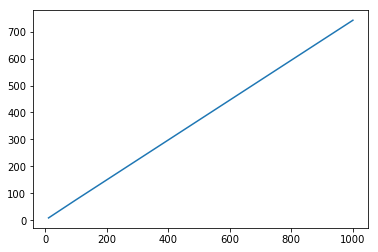

In [51]:
plt.show()

# Best Fit

In [52]:
result2=[]
for n in N:
    servers =[]
    num_servers = []
    for i in range(10**3):
        checkdeparture(servers, i)
        numberVMs = getNumberVMs(n)
        for vm in range(numberVMs):
            vmType = getTypeVM()
            depTime = getDepartureTime(i, vmType)
            if(len(servers)==0):
                servers.append({'res': [vmType], 'slot': [depTime]})
            else:
                found = False
                found_fit = False
                holder=[]
                for s in range(len(servers)):
                    if(np.sum(servers[s]['res'])+vmType==1):
                        servers[s]['res'].append(vmType)
                        servers[s]['slot'].append(depTime)
                        found = True
                        break
                    if(np.sum(servers[s]['res'])+vmType<1):
                        found_fit = True
                        holder.append(s)
                if((not found) and found_fit == True):
                    max_val=0
                    index_h=0
                    for h in holder:
                        if(max_val<(np.sum(servers[h]['res'])+vmType)):
                            max_val = (np.sum(servers[h]['res'])+vmType)
                            index_h = h
                    servers[index_h]['res'].append(vmType)
                    servers[index_h]['slot'].append(depTime)
                if(not found and found_fit == False):
                    servers.append({'res': [vmType], 'slot': [depTime]})
        num_servers.append(len(servers))
    result2.append(np.mean(num_servers))

In [53]:
result2

[8.5809999999999995, 75.856999999999999, 737.85799999999995]

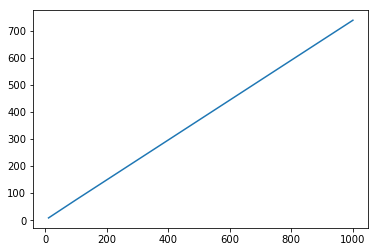

In [54]:
plt.plot(N, result2)
plt.show()

In [55]:
plt.plot(N,result2)
plt.plot(N, result)

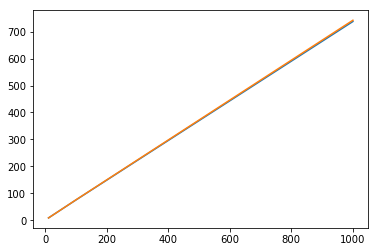

In [56]:
plt.show()